<a href="https://colab.research.google.com/github/Karthi-2-2/PROJECT/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/diabetes_dataset.csv")
print(df)
df.head()
df.info()


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

/tmp/ipython-input-891184106.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


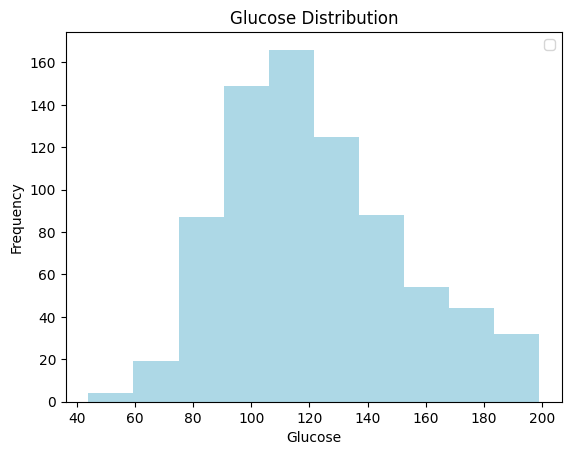

/tmp/ipython-input-891184106.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


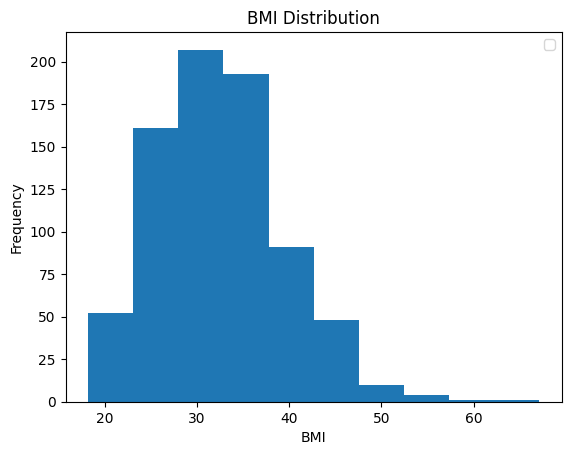

/tmp/ipython-input-891184106.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


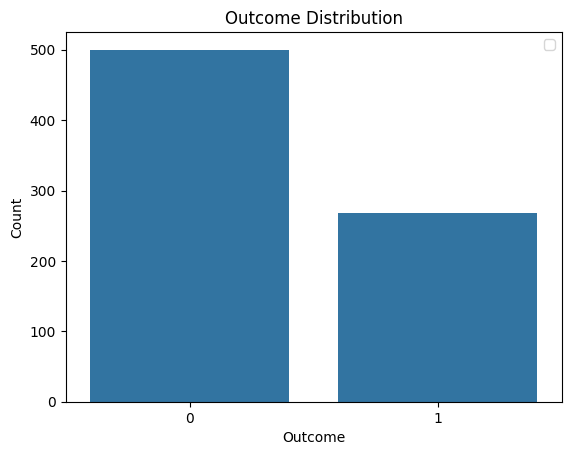

In [ ]:
#Initial Feature Exploration
df.describe()
df["Outcome"].value_counts()
df['Outcome'].value_counts(normalize=True) * 100

# Histogram for Glucose
plt.hist(df['Glucose'],color="lightblue")
plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Histogram for BMI
plt.hist(df['BMI'])
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Countplot
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
#Data Preprocessing and Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop("Outcome", axis=1)
y=df["Outcome"]

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
#Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7662337662337663
Confusion Matrix:
 [[82 17]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

